In [20]:
import json
import numpy as np
import pandas as pd

In [21]:
actions_raw = json.load(open('train_25k_images_actions.json'))
reasons_raw = json.load(open('train_25k_images_reasons.json'))

FileNotFoundError: [Errno 2] No such file or directory: 'train_25k_images_actions.json'

In [ ]:
actions_raw.keys()

In [ ]:
# reasons_raw

In [ ]:
images = pd.DataFrame(actions_raw['images'])
images.head(3)

In [ ]:
reasons = pd.DataFrame(reasons_raw)
reasons.head(3)

In [ ]:
reasons.dtypes

In [ ]:
actions = pd.DataFrame(actions_raw['annotations'])
actions.head(3)

In [ ]:
t1 = pd.merge(images,reasons,on='file_name',how='inner')
t1.head(3)

In [ ]:
final = pd.merge(t1,actions,on='id',how='inner')
final.head()

In [ ]:
# def filter_func(row):
#     if (len(row['category'])==4) or (row['category'][4]==0):
#         return True
#     else:
#         return False
    
# final.apply(filter_func,axis=1).sum()

In [ ]:
f = lambda x: x[:4] if (len(x)==4) or (x[4]==0) else None

final['category'] = final['category'].apply(f)

final.dropna(inplace=True)

In [ ]:
final

In [ ]:
mode = 'test'
with open('%s_25k_images_actions.json'%mode) as f:
    actions_raw = json.load(f)
    
mode = 'test'
with open('%s_25k_images_reasons.json'%mode) as f:
    reasons_raw = json.load(f)

images = pd.DataFrame(actions_raw['images'])

reasons = pd.DataFrame(reasons_raw)
pd.merge(images,reasons,on='file_name',how='inner')

In [ ]:
reasons['file_name'].sort_values()

In [ ]:
images['file_name'].sort_values()

In [ ]:
reasons

## Streamlized

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

label_home = './data/bdd_oia/lastframe/labels/'
def cleaning(mode='train'):
    with open(label_home+'%s_25k_images_actions.json'%mode) as f:
        actions_raw = json.load(f)
    with open(label_home+'%s_25k_images_reasons.json'%mode) as f:
        reasons_raw = json.load(f)

    images = pd.DataFrame(actions_raw['images'])

    reasons = pd.DataFrame(reasons_raw)

    actions = pd.DataFrame(actions_raw['annotations'])
    
    t1 = pd.merge(images,reasons,on='file_name',how='inner')
    final = pd.merge(t1,actions,on='id',how='inner')
    
    f = lambda x: x[:4] if (len(x)==4) or (x[4]==0) else None

    final['category'] = final['category'].apply(f)

    final.dropna(inplace=True)
    
    print(len(final))
    
    final.rename(columns={'category':'action'},inplace=True)

    return final

val_set = cleaning('val')
train_set = cleaning('train')
test_set = cleaning('test')

# train_set.to_csv(label_home + 'train_labels.csv',index=False)
# val_set.to_csv(label_home + 'val_labels.csv',index=False)
# test_set.to_csv(label_home + 'test_labels.csv',index=False)

2259
16028
4548


In [2]:
with open(label_home+'readme.txt') as f:
    txt = f.readlines()
    
all_reasons = np.array([lab.strip()[:-1] for lab in txt[6:-1]])
all_actions = np.array(['move forward','stop/slow down','turn left','turn right'])

In [3]:
reason_map = dict(zip(all_reasons,range(len(all_reasons))))
action_map = dict(zip(all_actions,range(len(all_actions))))

In [4]:
def select_reason(row,ind):
    if row['reason'][reason_ind] == 1:
        return True
    return False
f1 = lambda row,ind: True if row['reason'][reason_ind] == 1 else False

def select_action(row,ind):
    if row['action'][reason_ind] == 1:
        return True
    return False

f2 = lambda row,ind: True if row['action'][action_ind] == 1 else False

In [5]:
# select out the reasons with traffic lights issues

def clean_and_combine(sets,item,ind_list):

    f = lambda row,ind: True if row[item][ind] == 1 else False

    return_df = None
    for s in sets:
        for i in ind_list:
            return_df = pd.concat([return_df, s[s.apply(f,axis=1,ind=i)]])
    return return_df

reason_ind_list = [2, 7, 11, 14]
sets = [train_set, val_set, test_set]
traffic_light_dataset = clean_and_combine(sets,'reason',reason_ind_list)

In [6]:
traffic_light_dataset

,id,file_name,width,height,reason,action
0,0,9af44b54-7aae6c7d_3.jpg,720,1280,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1]"
3,3,a6a897ca-9b69c277_1.jpg,720,1280,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 1]"
8,8,b1f4491b-9958bd99_3.jpg,720,1280,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0]"
12,12,795378f0-8783f2d3_1.jpg,720,1280,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 1]"
14,14,895f8207-befdd581_1.jpg,720,1280,"[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1]"
...,...,...,...,...,...,...
4486,4486,eb01d067-b52cd095.jpg,720,1280,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, ...","[0, 1, 0, 1]"
4519,4519,f21f7d33-b59d0bf8.jpg,720,1280,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, ...","[0, 1, 0, 1]"
4531,4531,f4938d8e-6153fdae.jpg,720,1280,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[1, 0, 0, 1]"
4552,4552,fab2ccdf-e5b353c8.jpg,720,1280,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[1, 0, 0, 1]"


## No dataset

In [15]:
no_dataset = clean_and_combine(sets,'reason',range(15,21))

In [16]:
no_dataset['reason'] = no_dataset['reason'].apply(lambda x: np.array(x[-6:]))

reason = np.array(list(no_dataset['reason']))


In [17]:
no_dataset

,id,file_name,width,height,reason,action
2,2,954149ed-2102c512_3.jpg,720,1280,"[1, 0, 1, 0, 0, 0]","[1, 0, 0, 1]"
9,9,08c272df-0638c5ca_1.jpg,720,1280,"[1, 0, 0, 0, 1, 0]","[0, 1, 0, 0]"
16,16,0738f42e-fe0d895e_3.jpg,720,1280,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 1]"
20,20,57e171f1-00d42305_1.jpg,720,1280,"[1, 0, 0, 0, 1, 0]","[0, 1, 0, 0]"
24,24,7cc97a0b-203efcdd_1.jpg,720,1280,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 1]"
...,...,...,...,...,...,...
4504,4504,efae0c14-d7c484be.jpg,720,1280,"[0, 0, 1, 1, 0, 1]","[0, 1, 0, 0]"
4505,4505,efc83579-e8863f07.jpg,720,1280,"[0, 0, 0, 0, 1, 1]","[0, 1, 1, 0]"
4515,4515,f1cd3b02-b732250b.jpg,720,1280,"[0, 0, 1, 0, 0, 1]","[1, 0, 0, 0]"
4534,4534,f6565aa0-b60cedfa.jpg,720,1280,"[0, 0, 1, 0, 1, 1]","[1, 0, 0, 0]"


In [18]:
# no_dataset = no_dataset[['file_name','reason','action']]
# no_dataset.to_csv(label_home+'no_dataset.csv',index=False)

In [28]:
# create language labels
reason_list = np.array([r.split('-')[-1].strip() for r in all_reasons[-6:]])
reason_list

array(['obstacles on the leftlane', 'no lane on the left',
       'solidline on the left', 'obstacles on the rightlane',
       'no lane on the right', 'solidline on the right'], dtype='<U26')

In [30]:
import nltk
# nltk.download('punkt')
word_list = nltk.word_tokenize(';'.join(reason_list))
unique_word_list = np.unique(word_list+['SOS','EOS'])
word_to_ind = dict(zip(unique_word_list,np.arange(len(unique_word_list))))
ind_to_word = dict(zip(np.arange(len(unique_word_list)),unique_word_list))

In [49]:
import pickle 

with open(label_home+"word_to_ind.pkl",'wb') as f:
    pickle.dump(word_to_ind,f)

with open(label_home+"ind_to_word.pkl",'wb') as f:
    pickle.dump(ind_to_word,f)

word_to_ind,ind_to_word

({';': 0,
  'EOS': 1,
  'SOS': 2,
  'lane': 3,
  'left': 4,
  'leftlane': 5,
  'no': 6,
  'obstacles': 7,
  'on': 8,
  'right': 9,
  'rightlane': 10,
  'solidline': 11,
  'the': 12},
 {0: ';',
  1: 'EOS',
  2: 'SOS',
  3: 'lane',
  4: 'left',
  5: 'leftlane',
  6: 'no',
  7: 'obstacles',
  8: 'on',
  9: 'right',
  10: 'rightlane',
  11: 'solidline',
  12: 'the'})

In [50]:
with open(label_home+'word_to_ind.pkl','rb') as f:
    tst = pickle.load(f)
tst


{';': 0,
 'EOS': 1,
 'SOS': 2,
 'lane': 3,
 'left': 4,
 'leftlane': 5,
 'no': 6,
 'obstacles': 7,
 'on': 8,
 'right': 9,
 'rightlane': 10,
 'solidline': 11,
 'the': 12}

In [39]:
reason_ind_list = []
for r in reason_list:
    tmp = []
    for w in r.split(' '):
        tmp.append(word_to_ind[w])
    reason_ind_list.append(tmp)   
reason_ind_list

[[7, 8, 12, 5],
 [6, 3, 8, 12, 4],
 [11, 8, 12, 4],
 [7, 8, 12, 10],
 [6, 3, 8, 12, 9],
 [11, 8, 12, 9]]

In [33]:
f = lambda x: ';'.join(reason_list[x==1])
no_dataset['reason_lang'] = no_dataset['reason'].apply(f)

In [34]:
no_dataset

,id,file_name,width,height,reason,action,reason_lang
2,2,954149ed-2102c512_3.jpg,720,1280,"[1, 0, 1, 0, 0, 0]","[1, 0, 0, 1]",obstacles on the leftlane;solidline on the left
9,9,08c272df-0638c5ca_1.jpg,720,1280,"[1, 0, 0, 0, 1, 0]","[0, 1, 0, 0]",obstacles on the leftlane;no lane on the right
16,16,0738f42e-fe0d895e_3.jpg,720,1280,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 1]",obstacles on the leftlane
20,20,57e171f1-00d42305_1.jpg,720,1280,"[1, 0, 0, 0, 1, 0]","[0, 1, 0, 0]",obstacles on the leftlane;no lane on the right
24,24,7cc97a0b-203efcdd_1.jpg,720,1280,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 1]",obstacles on the leftlane
...,...,...,...,...,...,...,...
4504,4504,efae0c14-d7c484be.jpg,720,1280,"[0, 0, 1, 1, 0, 1]","[0, 1, 0, 0]",solidline on the left;obstacles on the rightla...
4505,4505,efc83579-e8863f07.jpg,720,1280,"[0, 0, 0, 0, 1, 1]","[0, 1, 1, 0]",no lane on the right;solidline on the right
4515,4515,f1cd3b02-b732250b.jpg,720,1280,"[0, 0, 1, 0, 0, 1]","[1, 0, 0, 0]",solidline on the left;solidline on the right
4534,4534,f6565aa0-b60cedfa.jpg,720,1280,"[0, 0, 1, 0, 1, 1]","[1, 0, 0, 0]",solidline on the left;no lane on the right;sol...


In [44]:
def f_reason_lang_ind(x):
    count = 0
    return_list = [word_to_ind['SOS']]
    for i, r in enumerate(x):
        if r==1:
            if count > 0:
                return_list.append(word_to_ind[';'])
            return_list.extend(reason_ind_list[i])
            count+=1
    return_list.append(word_to_ind['EOS'])
    return return_list

no_dataset['reason_lang_ind'] = no_dataset['reason'].apply(f_reason_lang_ind)


In [45]:
no_dataset

,id,file_name,width,height,reason,action,reason_lang,reason_lang_ind
2,2,954149ed-2102c512_3.jpg,720,1280,"[1, 0, 1, 0, 0, 0]","[1, 0, 0, 1]",obstacles on the leftlane;solidline on the left,"[2, 7, 8, 12, 5, 0, 11, 8, 12, 4, 1]"
9,9,08c272df-0638c5ca_1.jpg,720,1280,"[1, 0, 0, 0, 1, 0]","[0, 1, 0, 0]",obstacles on the leftlane;no lane on the right,"[2, 7, 8, 12, 5, 0, 6, 3, 8, 12, 9, 1]"
16,16,0738f42e-fe0d895e_3.jpg,720,1280,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 1]",obstacles on the leftlane,"[2, 7, 8, 12, 5, 1]"
20,20,57e171f1-00d42305_1.jpg,720,1280,"[1, 0, 0, 0, 1, 0]","[0, 1, 0, 0]",obstacles on the leftlane;no lane on the right,"[2, 7, 8, 12, 5, 0, 6, 3, 8, 12, 9, 1]"
24,24,7cc97a0b-203efcdd_1.jpg,720,1280,"[1, 0, 0, 0, 0, 0]","[1, 0, 0, 1]",obstacles on the leftlane,"[2, 7, 8, 12, 5, 1]"
...,...,...,...,...,...,...,...,...
4504,4504,efae0c14-d7c484be.jpg,720,1280,"[0, 0, 1, 1, 0, 1]","[0, 1, 0, 0]",solidline on the left;obstacles on the rightla...,"[2, 11, 8, 12, 4, 0, 7, 8, 12, 10, 0, 11, 8, 1..."
4505,4505,efc83579-e8863f07.jpg,720,1280,"[0, 0, 0, 0, 1, 1]","[0, 1, 1, 0]",no lane on the right;solidline on the right,"[2, 6, 3, 8, 12, 9, 0, 11, 8, 12, 9, 1]"
4515,4515,f1cd3b02-b732250b.jpg,720,1280,"[0, 0, 1, 0, 0, 1]","[1, 0, 0, 0]",solidline on the left;solidline on the right,"[2, 11, 8, 12, 4, 0, 11, 8, 12, 9, 1]"
4534,4534,f6565aa0-b60cedfa.jpg,720,1280,"[0, 0, 1, 0, 1, 1]","[1, 0, 0, 0]",solidline on the left;no lane on the right;sol...,"[2, 11, 8, 12, 4, 0, 6, 3, 8, 12, 9, 0, 11, 8,..."


In [51]:
# Clean and save
no_dataset = no_dataset[['file_name','reason','action','reason_lang','reason_lang_ind']]
no_dataset.to_csv(label_home+'no_dataset.csv',index=False)

In [48]:
len(no_dataset.iloc[59]['reason_lang_ind'])

33

In [81]:
reason = np.array(list(no_dataset['reason']))

In [89]:


np.unique(reason.sum(axis=1),return_counts=True)

(array([1, 2, 3, 4, 6]), array([ 6521, 15136,  2730,   528,     6]))

In [61]:
reason.sum(axis=0)

array([ 8475,  7989,  7625, 11521,  6771,  4750])

In [62]:
reason.sum(axis=1).max(axis=0)

6

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train, test = train_test_split(no_dataset, test_size=0.2)


In [54]:
train.to_csv(label_home+'no_train.csv',index=False)

In [55]:
test.to_csv(label_home+'no_test.csv',index=False)

In [9]:
different_reason_numbers = []
for i in range(21):
    different_reason_numbers.append(len(train_set[train_set.apply(f1,axis=1,reason_ind=i)]))

In [75]:
dict(zip(reason_map.keys(),different_reason_numbers))

{'f_follow_traffic: Forward - follow traffic': 5470,
 'f_road_clear: Forward - the road is clear': 2441,
 'f_traffic_light: Forward - the traffic light is green': 3416,
 's_ob_car: Stop/slow down - obstacle: car': 3760,
 's_ob_ped: Stop/slow down - obstacle: person/pedestrain': 1090,
 's_ob_rider: Stop/slow down - obstacle: rider': 171,
 's_other: Stop/slow down - obstacle: others': 116,
 's_traffic_light: Stop/slow down - the traffic light': 3695,
 's_traffic_sign: Stop/slow down - the traffic sign': 329,
 'l_front_car: Turn left - front car turning left': 100,
 'l_lane: Turn left - on the left-turn lane': 463,
 'l_traffic_light: Turn left - traffic light allows': 220,
 'r_front_car: Turn right - front car turning right': 114,
 'r_lane: Turn right - on the right-turn lane': 626,
 'r_traffic_light: Turn right - traffic light allows': 270,
 "no_l_car - Can't turn left - obstacles on the left lane": 3182,
 "no_l_lane - Can't turn left - no lane on the left": 3175,
 "no_l_solid_line - Can

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

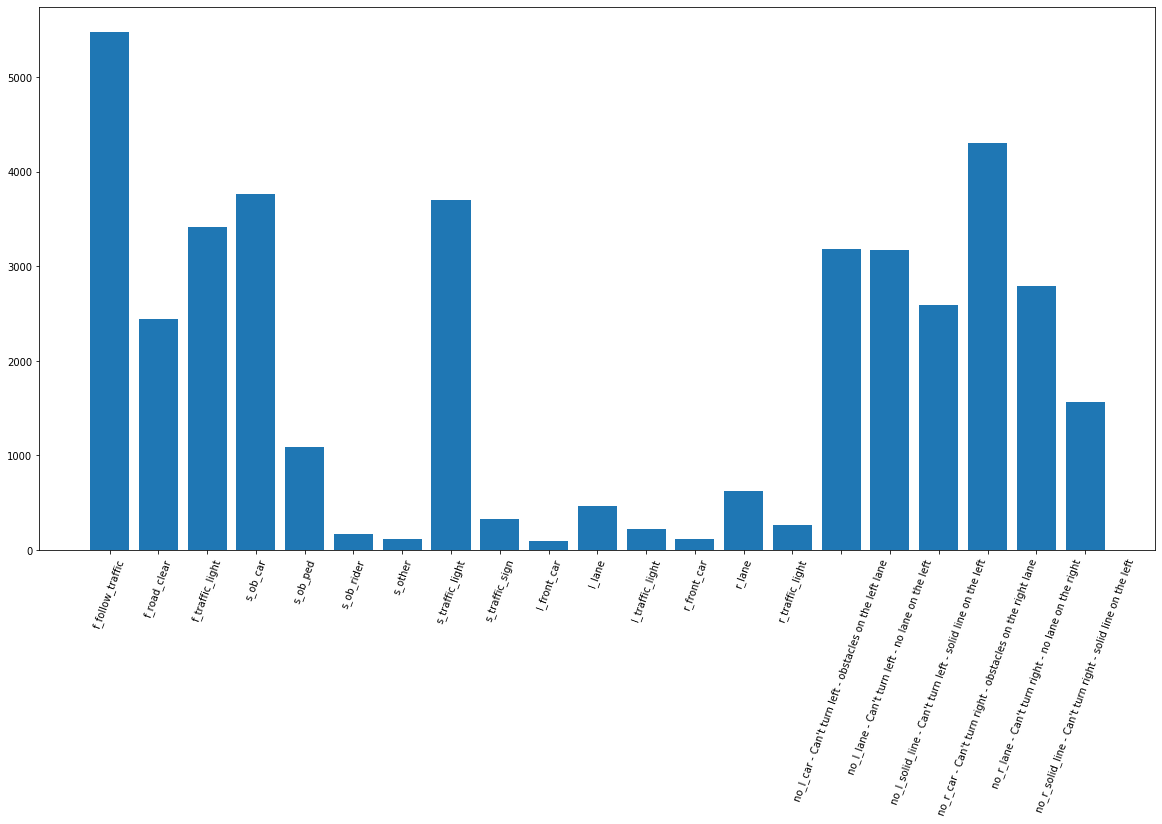

In [76]:
reason_labels = [k.split(':')[0] for k in reason_map.keys()]

plt.figure(figsize=(20,10))
plt.bar(reason_labels,np.array(different_reason_numbers))
plt.xticks(rotation=70)

In [80]:
different_action_numbers = []
for i in range(4):
    different_action_numbers.append(len(train_set[train_set.apply(f2,axis=1,action_ind=i)]))

In [81]:
dict(zip(action_map.keys(),different_action_numbers))

{'move forward': 8748,
 'stop/slow down': 7298,
 'turn left': 4109,
 'turn right': 4527}

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

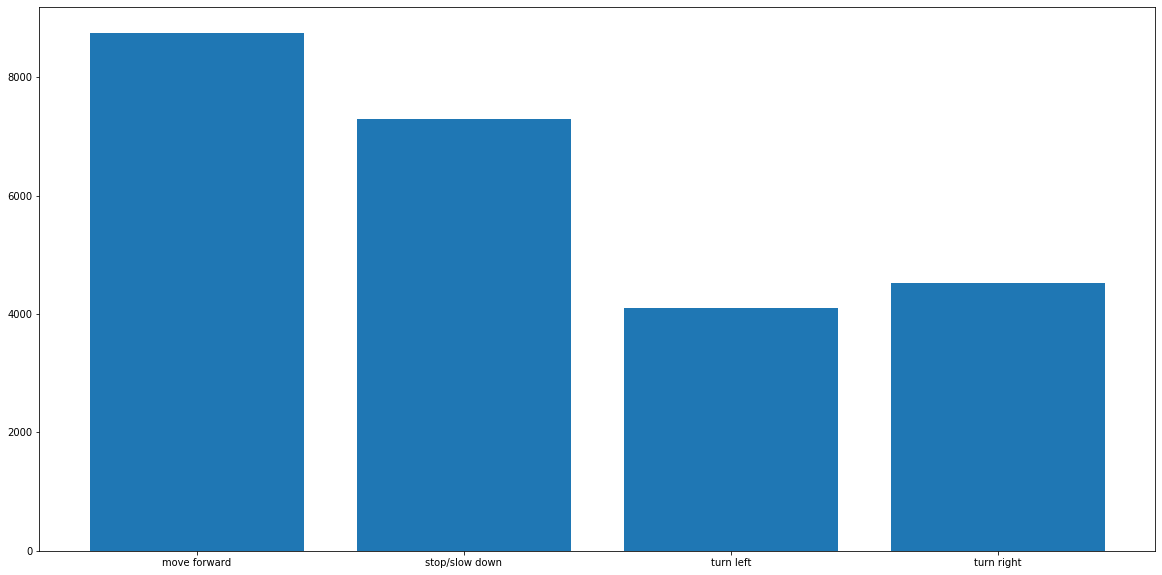

In [83]:
plt.figure(figsize=(20,10))

plt.bar(action_map.keys(),np.array(different_action_numbers))
plt.xticks()